<a href="https://colab.research.google.com/github/ayyucedemirbas/machine_learning_algorithms/blob/master/bayesian_conv_neural_net_weather_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import tensorflow_probability as tfp
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image
import numpy as np
import os
import datetime
%matplotlib inline


In [ ]:
!ls -al /content/drive/MyDrive/weather

total 15
-rw------- 1 root root 6148 Oct 15 19:55 .DS_Store
drwx------ 2 root root 4096 Oct 15 19:59 test
drwx------ 2 root root 4096 Oct 15 19:59 train


In [2]:
imagePath = "/content/drive/MyDrive/weather/train"
test_path="/content/drive/MyDrive/weather/test"

In [3]:
batch_size=32
img_height = 100
img_width = 100

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  imagePath,
  #color_mode='grayscale',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 960 files belonging to 4 classes.
Using 768 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  imagePath, 
  #color_mode='grayscale',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 960 files belonging to 4 classes.
Using 192 files for validation.


In [5]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_path,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 179 files belonging to 4 classes.


In [6]:
x_train= tf.concat([x for x, y in train_ds], axis=0)
y_train= tf.concat([y for x, y in train_ds], axis=0)
x_test= tf.concat([x for x, y in test_ds], axis=0)
y_test= tf.concat([y for x, y in test_ds], axis=0)

In [7]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 100, 100, 3)
(32,)


In [8]:
num_labels = 4
input_shape=(100, 100, 3)

In [9]:
def bnn_model(): 

  model_in = tf.keras.layers.Input(shape=input_shape)
  conv_1 = tfp.python.layers.Convolution2DFlipout(32, kernel_size=(3, 3), padding="same", strides=2)
  x = conv_1(model_in)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation('relu')(x)
  conv_2 = tfp.python.layers.Convolution2DFlipout(64, kernel_size=(3, 3), padding="same", strides=2)
  x = conv_2(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation('relu')(x)
  x = tf.keras.layers.Flatten()(x)
  dense_1 = tfp.python.layers.DenseFlipout(512, activation='relu')
  x = dense_1(x)
  dense_2 = tfp.python.layers.DenseFlipout(8, activation=None)
  model_out = dense_2(x)  # logits
  model = tf.keras.Model(model_in, model_out)
  return model

In [10]:
model=bnn_model()

/usr/local/lib/python3.7/dist-packages/keras/engine/base_layer.py:2223: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '


In [11]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [12]:
EPOCHS = 40
history = model.fit(
    train_ds, 
    validation_data=val_ds,  
    epochs=EPOCHS
)

Epoch 1/40
24/24 [==============================] - 10s 216ms/step - loss: 49522996.0000 - accuracy: 0.5182 - val_loss: 47017804.0000 - val_accuracy: 0.5104
Epoch 2/40
24/24 [==============================] - 5s 173ms/step - loss: 44751456.0000 - accuracy: 0.5391 - val_loss: 42300672.0000 - val_accuracy: 0.4635
Epoch 3/40
24/24 [==============================] - 5s 183ms/step - loss: 40071888.0000 - accuracy: 0.4570 - val_loss: 37665360.0000 - val_accuracy: 0.3906
Epoch 4/40
24/24 [==============================] - 5s 183ms/step - loss: 35484968.0000 - accuracy: 0.4180 - val_loss: 33135904.0000 - val_accuracy: 0.3906
Epoch 5/40
24/24 [==============================] - 5s 186ms/step - loss: 31018426.0000 - accuracy: 0.4036 - val_loss: 28743854.0000 - val_accuracy: 0.2969
Epoch 6/40
24/24 [==============================] - 5s 188ms/step - loss: 26707360.0000 - accuracy: 0.4297 - val_loss: 24528250.0000 - val_accuracy: 0.3385
Epoch 7/40
24/24 [==============================] - 5s 186ms/st

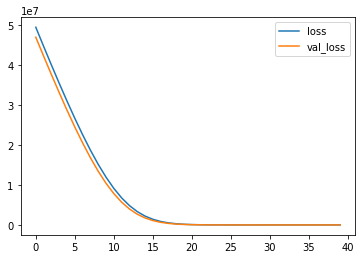

In [13]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [14]:
eval=model.evaluate(val_ds)

6/6 [==============================] - 1s 46ms/step - loss: 1.4026 - accuracy: 0.2708


In [15]:
pred=model.predict(val_ds)